# CASO PRÁCTICO

## Ejercicio 1

Con el csv de acciones de Apple (AAPL.csv), realiza las siguientes visualizaciones:
* **Matplotlib**: Obtén un diagrama de barras de las 5 primeras fechas del dataset para los precios de apertura y cierre.
* **Ggplot**: Realiza una nube de puntos con el volumen de acción y el cierre ajustado, muestra además la línea de ajuste (regresión lineal), entre ambas variables, utiliza un gradiente de color mediante el precio de cierre ajustado.
* **Seaborn 1**: Realiza un mapa de calor mediante la correlación del dataframe
* **Seaborn 2**: Obtén un histograma desactivando la función de densidad
* **Bokeh**: Realiza una gráfica de toda la serie temporal sobre los precios más altos y más bajos, para que se diferencien más las líneas resta 40 puntos a todos los precios más bajos.

### SOLUCIÓN

Importamos todas las librerías y realizamos una pequeña descripción de los datos.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from plotnine import *
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

In [2]:
df = pd.read_csv('AAPL.csv')

In [3]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,3270.000000,3270.000000,3270.000000,3270.000000,3.270000e+03,3270.000000
mean,151.216673,153.017789,149.103336,151.108138,2.151112e+07,140.505248
std,165.485538,166.815882,163.681717,165.277867,1.482164e+07,165.408965
min,12.990000,13.190000,12.720000,13.120000,1.405000e+06,6.380000
25%,24.592500,25.060000,24.092500,24.712500,1.159570e+07,12.020000
50%,85.415000,86.500000,84.355000,85.340000,1.730015e+07,72.410000
75%,198.957500,200.762500,196.027500,198.010000,2.744490e+07,192.572500
max,702.410000,705.070000,699.570000,702.100000,2.650690e+08,685.760000


In [4]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2000-03-01,118.56,132.06,118.50,130.31,38478000,31.68
1,2000-03-02,127.00,127.94,120.69,122.00,11136800,29.66
2,2000-03-03,124.87,128.23,120.00,128.00,11565200,31.12
3,2000-03-06,126.00,129.13,125.00,125.69,7520000,30.56
4,2000-03-07,126.44,127.44,121.12,122.87,9767600,29.87


In [7]:
print("*CANTIDAD de datos nulos por columna en el dataframe")
print(df.isnull().sum())
print("----------------------------------")
print("*PORCENTAJE de datos nulos por columna en el dataframe")
print(df.isnull().sum()/len(df)*100)

*CANTIDAD de datos nulos por columna en el dataframe
Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64
----------------------------------
*PORCENTAJE de datos nulos por columna en el dataframe
Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Volume       0.0
Adj Close    0.0
dtype: float64


## Matplotlib

Obtenemos las 5 primeras posiciones de las fechas, precios de apertura y cierre.

En la gráfica, debemos tener en cuenta que los valores de la fecha, es necesario que se pasen como tuplas.

In [6]:
df_ten = df[['Date', 'Open', 'Close']].head(5)

ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of ticklabels (3270).

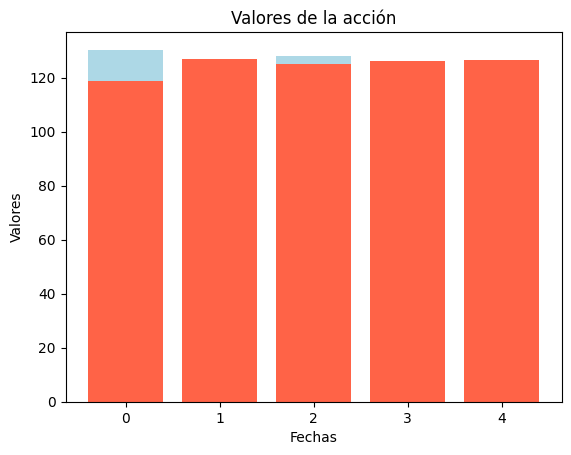

In [8]:
n_groups = len(df_ten)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)


min_ = plt.bar(index , df_ten['Close'], color='lightblue', 
                 label='Cierre')

max_ = plt.bar(index, df_ten['Open'], color='tomato', 
                 label='Apertura')

plt.xlabel('Fechas')
plt.ylabel('Valores')
plt.title('Valores de la acción')
plt.xticks(index ,tuple(df['Date']))
plt.legend()

plt.tight_layout()
plt.show()

## Ggplot

Simplemente, mostramos dos capas diferentes una con el scatter plot y otra con el ajuste lineal (Evidentemente no hay relación lineal entre ambas variables).

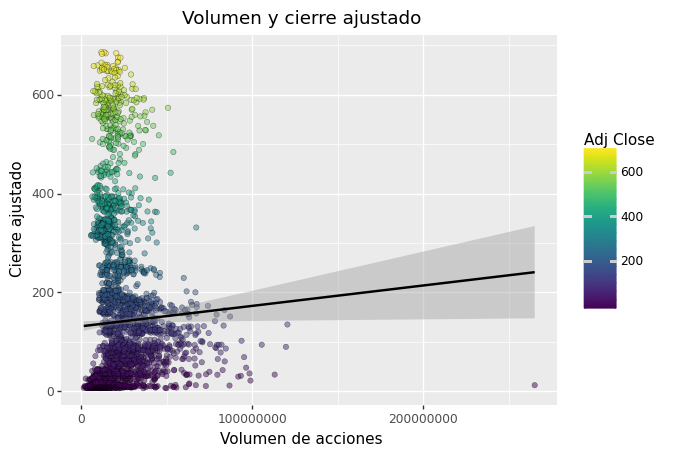

<ggplot: (689319177)>

In [9]:
(
    ggplot(df) +
     geom_point(aes(x='Volume', y = 'Adj Close', fill = 'Adj Close'),
               alpha=0.5,
               shape='o',
               size = 2,
               stroke = 0.2) 
    + geom_smooth(
        aes(x='Volume', y = 'Adj Close')
    )
    + labs(title='Volumen y cierre ajustado', 
         x = 'Volumen de acciones',
         y = 'Cierre ajustado')
)

## Seaborn 1

Utilizamos la función corr de pandas para ayudarnos.

/var/folders/cf/7nzhdlvs5nl0_zh6ky9hz9vc0000gn/T/ipykernel_4798/3942052299.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<AxesSubplot: >

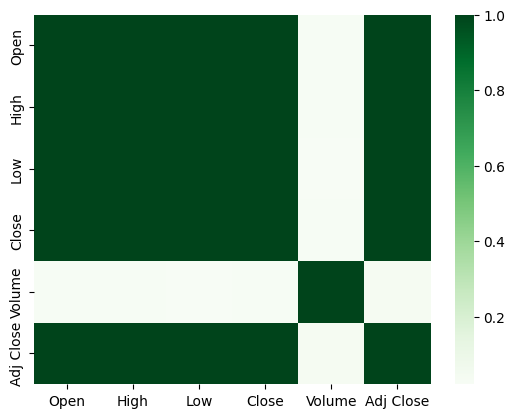

In [10]:
sns.heatmap(df.corr(), cmap='Greens')

## Seaborn 2

Para desactivar la función de densidad (curva de densidad), pasamos False al parámetro kde.

/var/folders/cf/7nzhdlvs5nl0_zh6ky9hz9vc0000gn/T/ipykernel_4798/2897263891.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



<AxesSubplot: xlabel='Volume'>

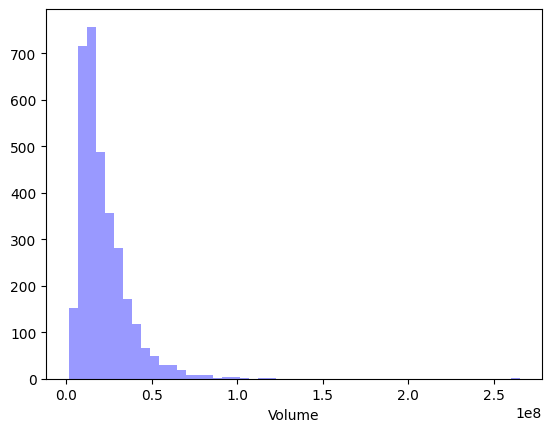

In [13]:
sns.distplot(a=df.Volume, color='blue', kde=False)

## Bokeh

Aquí es importante utilizar el formato de fechas adecuado, si simplemente pasamos en el eje x la columna 'Date' no aparecerá nada y es que, debemos cambiar el tipo de las fechas a numpy datetime64.

Finalmente, tenemos que especificar en figure al parámetro x_axis_type que nuestro eje x es formato **datetime**

In [14]:
output_notebook()

Loading BokehJS ...

In [15]:
correct_dates = np.array(df['Date'], dtype=np.datetime64)

In [16]:
p = figure(plot_width=800, plot_height=400, title = 'Acciones de Apple', x_axis_type="datetime")

p.line(correct_dates, df['High'], 
       color = 'blue', line_width=1, line_alpha = 0.5)
p.line(correct_dates, df['Low']-40, 
       color = 'green', line_width=1, line_alpha = 0.5)

p.xaxis.axis_label = 'Fechas (array)'
p.yaxis.axis_label = 'Valor de acción'

show(p)

Otra forma con elementos dinámicos

In [17]:
from bokeh.models import ColumnDataSource, HoverTool

df['New_Date'] = correct_dates
df['Low'] = df['Low']-40
source = ColumnDataSource(df)

In [18]:
source.column_names

['index',
 'Date',
 'Open',
 'High',
 'Low',
 'Close',
 'Volume',
 'Adj Close',
 'New_Date']

In [19]:
p = figure(plot_width=800, plot_height=400, title = 'Acciones de Apple', x_axis_type="datetime")

p.line('New_Date', 'High', source = source,
       color = 'purple', line_width=1, line_alpha = 0.5)
p.line('New_Date', 'Low', source = source,
       color = 'orange', line_width=1, line_alpha = 1)

p.xaxis.axis_label = 'Fechas (array)'
p.yaxis.axis_label = 'Valor de acción'

hover = HoverTool()
hover.tooltips=[
    ('Max', '@High'),
    ('Min', '@Low'),
    ('Apertura', '@Open'),
    ('Cierre', '@Close'),
    ('Fecha', '@Date')
]

p.add_tools(hover)

show(p)